## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
44,10-04-2020,10-04-2020 00:00,15472,8897,2197,3821,125,279,94,59,...,2.0,10.0,12.0,31.0,35.0,57.0,151.0,133.0,203.0,232.0
45,11-04-2020,11-04-2020 00:00,15987,9264,2327,3834,130,279,94,59,...,3.0,13.0,13.0,35.0,38.0,62.0,161.0,141.0,218.0,252.0
46,12-04-2020,12-04-2020 00:00,16585,9747,2426,3841,139,279,94,59,...,3.0,13.0,13.0,35.0,40.0,68.0,180.0,147.0,240.0,264.0
47,13-04-2020,13-04-2020 00:00,16934,9984,2477,3896,140,284,94,59,...,4.0,13.0,16.0,37.0,43.0,68.0,194.0,154.0,262.0,273.0
48,14-04-2020,14-04-2020 00:00,17448,10302,2549,3994,155,289,100,59,...,5.0,13.0,17.0,39.0,45.0,71.0,208.0,162.0,280.0,287.0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 84 columns):
data                                 49 non-null object
data_dados                           49 non-null object
confirmados                          49 non-null int64
confirmados_arsnorte                 49 non-null int64
confirmados_arscentro                49 non-null int64
confirmados_arslvt                   49 non-null int64
confirmados_arsalentejo              49 non-null int64
confirmados_arsalgarve               49 non-null int64
confirmados_acores                   49 non-null int64
confirmados_madeira                  49 non-null int64
confirmados_estrangeiro              16 non-null float64
confirmados_novos                    49 non-null int64
recuperados                          49 non-null int64
obitos                               49 non-null int64
internados                           41 non-null float64
internados_uci                       32 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,16.00000,49.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,4690.081633,2705.979592,631.530612,1181.632653,33.102041,87.040816,27.224490,20.510204,9.12500,356.081633,...,1.909091,6.863636,6.045455,20.772727,20.818182,37.500000,88.500000,82.363636,119.681818,148.045455
std,5851.633311,3425.191232,829.011512,1400.419293,46.411315,102.398722,34.632153,24.243661,5.86373,367.459399,...,1.064988,3.509110,5.899776,10.295315,14.968654,20.777162,62.660651,49.282031,85.423531,84.014442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,1.000000,2.000000,0.000000,4.000000,0.000000,5.000000,9.000000,12.000000,10.000000,23.000000
25%,39.000000,27.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,5.00000,9.000000,...,1.000000,4.250000,1.000000,14.250000,7.250000,20.750000,34.000000,39.750000,45.250000,79.000000
50%,1280.000000,644.000000,137.000000,448.000000,3.000000,31.000000,3.000000,5.000000,9.00000,260.000000,...,2.000000,6.000000,3.500000,19.000000,22.500000,36.500000,79.500000,83.500000,110.000000,146.000000
75%,9034.000000,5338.000000,1161.000000,2207.000000,59.000000,164.000000,57.000000,48.000000,11.00000,638.000000,...,2.000000,8.000000,12.000000,29.000000,34.000000,53.750000,135.500000,123.500000,186.500000,215.250000
max,17448.000000,10302.000000,2549.000000,3994.000000,155.000000,289.000000,100.000000,59.000000,21.00000,1516.000000,...,5.000000,13.000000,17.000000,39.000000,45.000000,71.000000,208.000000,162.000000,280.000000,287.000000


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


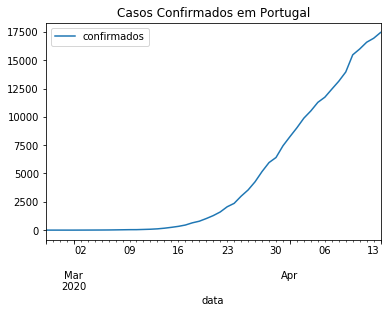

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

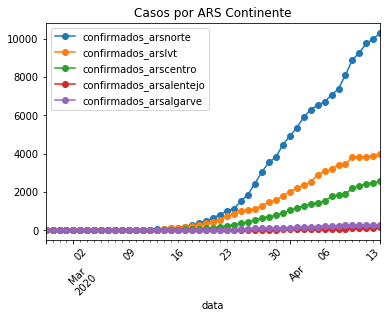

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

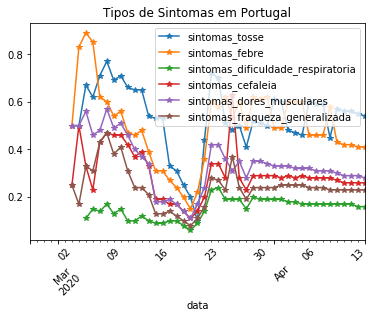

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

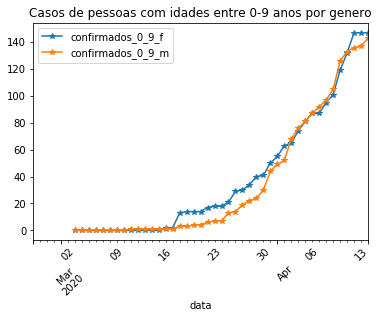

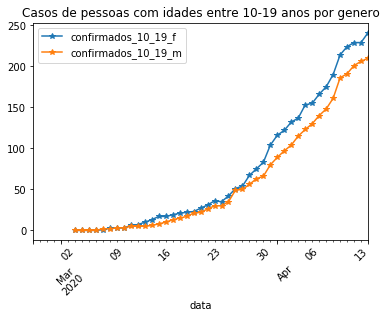

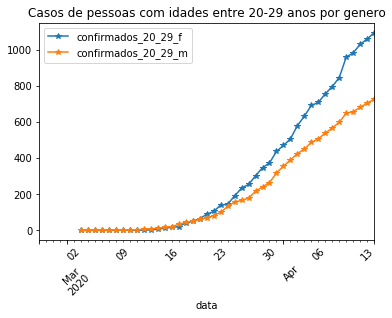

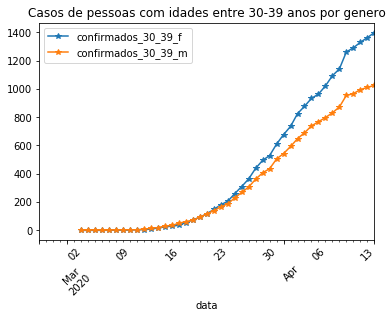

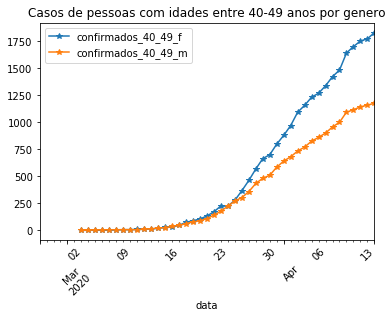

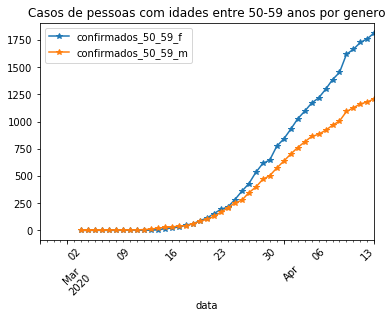

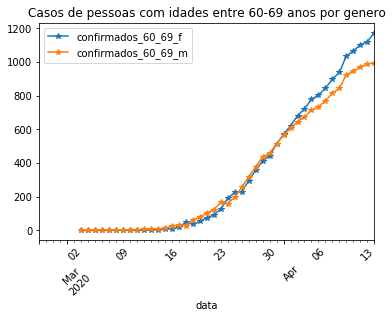

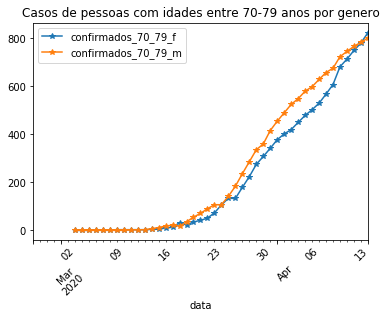

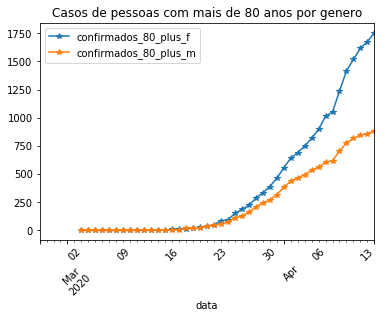

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


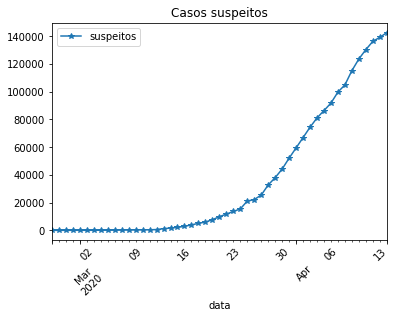

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

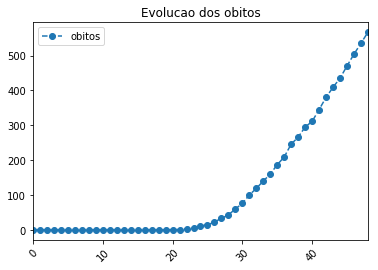

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060, 2362, 2995, 3544, 4268, 5170, 5962, 6408, 7443, 8251, 9034, 9886, 10524, 11278,11730, 12442, 13141, 13956, 15472, 15987, 16585, 16934, 17448])

In [15]:
print (confir)

[    2     4     6     9    13    21    30    39    41    59    78   112
   169   245   331   448   642   785  1020  1280  1600  2060  2362  2995
  3544  4268  5170  5962  6408  7443  8251  9034  9886 10524 11278 11730
 12442 13141 13956 15472 15987 16585 16934 17448]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:42]), x[:42])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     562.7
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           3.56e-25
Time:                        01:03:18   Log-Likelihood:                -44.161
No. Observations:                  42   AIC:                             92.32
Df Residuals:                      40   BIC:                             95.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2832      0.215     10.613      0.000       1.848       2.718
x1             0.2143      0.009     23.721      0.000       0.196       0.233
==============================================================================
Omnibus:                        4.446   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                3.168
Skew:                          -0.519   Prob(JB):                        0.205
Kurtosis:                       2.143   Cond. No.                         46.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

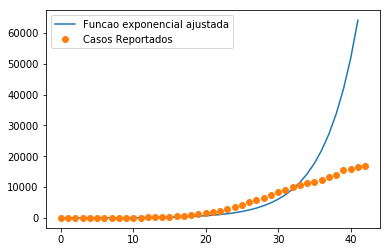

In [21]:
plt.plot(
    np.exp(resultado.predict(x[:42])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:43], "o", label="Casos Reportados")
plt.legend()
plt.show()